# Basic Animation (new style)

### with controls

* 2D scatter plot
* 1D line plot



In [8]:
# CONFIGURATION STEP (Please run it before the simulation code!)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from IPython.display import display, HTML

# Show Plot in The Notebook
%matplotlib ipympl

matplotlib.rcParams['figure.facecolor'] = 'w'          # remove grey background
import warnings                                        
#warnings.filterwarnings("ignore")                      # ignore Warning Messages

# 2D Example (scatter plot)

In [9]:
# Generate 2D sample snapshots using Gaussians

nx = 100
nz = 100
a = 10.

f     = np.zeros((nz, nx))                             # snapshot

# Initialize Plot
print("Plotting 2D snapshots")
fig1   = plt.figure(1)
v      = max([np.abs(f.min()), np.abs(f.max())])

image1 = plt.imshow(f, interpolation='nearest',
                    vmin=-v, vmax=+v, cmap=plt.cm.Greys)
plt.title('Acoustic wavefield ')

#plt.colorbar()
plt.xlim(0,nx)
plt.ylim(0,nz)
plt.xlabel('x')
plt.ylabel('z')

artists = []
#artists.append([image1, title])

# end initialize plot


# Time Stepping
for it in range(0,10):  
   
    for ix in range(0,nx):
        for iz in range(0,nz):
            f [ix,iz] = np.exp(-1./a**2 * ((ix-10*it)**2 + (iz-10*it)**2))

    ### PLOTTING IN TIME LOOP
    plt.title('Acoustic wavefield ')
    v      = max([np.abs(f.min()), np.abs(f.max())])
    image1 = plt.imshow(f, interpolation ='nearest', animated=True,vmin = -v, vmax = +v, cmap=plt.cm.Greys)
    artists.append([image1])    
 
   
ani = animation.ArtistAnimation(fig=fig1, artists=artists, interval=200)
display(HTML(ani.to_jshtml()))
plt.close()



Plotting 2D snapshots


# 1D (line plot)

**Comment** I don't understand why the graph appears twice, once with controls and once animated all the time

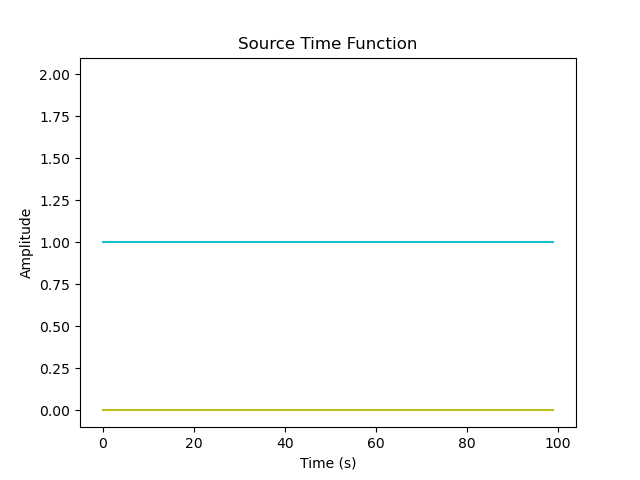

In [10]:
# physics
nx = 100
a = 10.
x=np.linspace(0,99,100)
data     = np.zeros((nx))                             # snapshot



fig, ax = plt.subplots()


artists = []
for i in range(20):
    for ix in range(0,nx):
        data[ix] = np.exp(-1./a**2 * ((ix-10*i)**2))

    ax.set_title('Source Time Function')
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    container = ax.plot(x,data,x,data+1)
    artists.append(container)


ani = animation.ArtistAnimation(fig=fig, artists=artists, interval=400)
display(HTML(ani.to_jshtml()))
#plt.show()
